# Pymaceuticals Inc.
---

### Analysis

- Given the provided data and the summarized statistics we can conclude the following information about the provided dataset and a drug regimens effect on overall tumor volume in test mice; Drug regimen, Ramicane and Capomulin, more often produce a lower tumor volume over time (in comparison to Infubinol and Ceftamin) and seem to be the most effective of those tested. This conclusion is drawn from various points of data: tumor volume variance, mean tumor volume and the visualization of the drug regimen results in the provided box plot. We can further see this in the treatment of mouse l509, following 30 days with the drug regimen the tumor volume dropped significantly (5-8mm3). However, following the 35 day mark, we begin to notice a slight increase in tumor volume for mouse l509. Given the summary statistics, Ramicane seems to be the most effective of all 10 drug regimens used in the study. Ramicane shows having the least amount of tumor volume variance, mean and median tumor volume, only followed closely by Capomulin.  

- Mouse weight has a positive correlation to tumor volume, this makes sense logically given that larger mice have a higher food intake which provides additional nutrients for tumor growth. I think it would be interesting to study the correlation between male and female mice and the average tumor volume, response to specific drug regimens, etc. Does the sex of mice have an affect on the way tumors metastasize or responds to different drug regimens? 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
mouse_data_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_results = mouse_data_results[mouse_data_results.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_ids = duplicate_results['Mouse ID'].unique()
duplicate_results = mouse_data_results.groupby(['Mouse ID', 'Timepoint']).size()

# Select the entries where count is greater than 1
duplicate_mice = duplicate_results[duplicate_results > 1].reset_index()['Mouse ID'].unique()

print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_data_results[mouse_data_results['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_data.head(13)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data_results.drop_duplicates()

# Display the first few rows of the clean DataFrame
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_data_filtered = clean_data[clean_data["Mouse ID"] != 'g989']

clean_mice_count = clean_data_filtered["Mouse ID"].nunique()
print(clean_mice_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

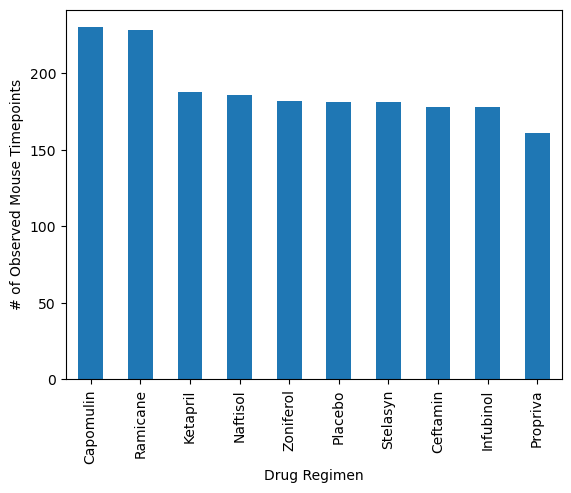

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Groupby Drug Regimen and count observed time points with size of dataset
regimen_count = mouse_data_results.groupby('Drug Regimen').size()

# Order drug regimen in descending order to reflect example
regimen_count_ordered = regimen_count.sort_values(ascending = False)

# Plot bar chart and define size of figure (entire chart)
regimen_count_ordered.plot(kind='bar')

# Define X and Y variables
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Set xticks to align with example
plt.xticks(rotation=90)

plt.show()

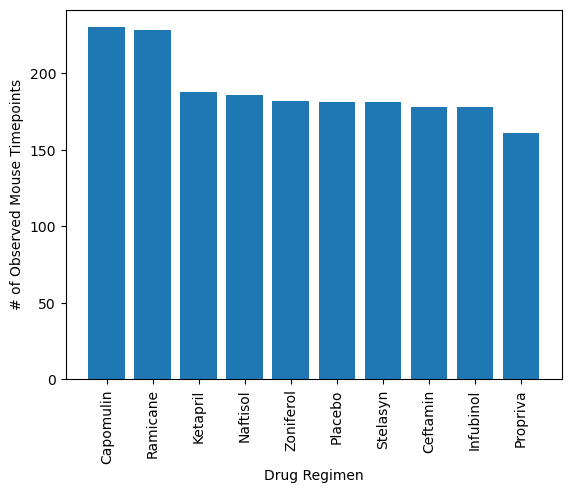

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



plt.bar(regimen_count_ordered.index, regimen_count_ordered)

# Define X and Y variables
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Set xticks to align with example
plt.xticks(rotation=90)

plt.show()

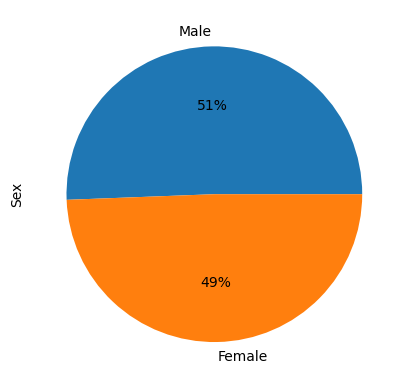

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution=mouse_data_results['Sex'].value_counts()

sex_distribution.plot(kind='pie', autopct=lambda p: '{:.0f}%'.format(round(p)))

plt.ylabel('Sex')
plt.show()

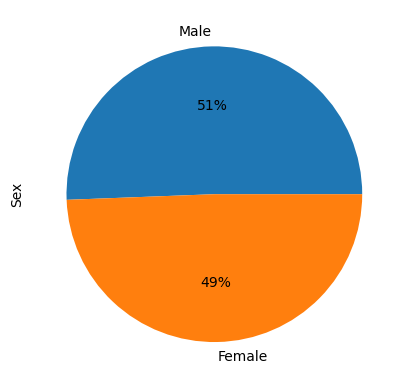

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels = sex_distribution.index, autopct='%.0f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint, mouse_data_results, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_tumor_volume = tumor_volume[tumor_volume['Drug Regimen'].isin(treatment_regimens)]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = last_tumor_volume.loc[last_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Print out results for treatment outliers
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
for treatment in treatments:
    tumor_volumes = last_tumor_volume.loc[last_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

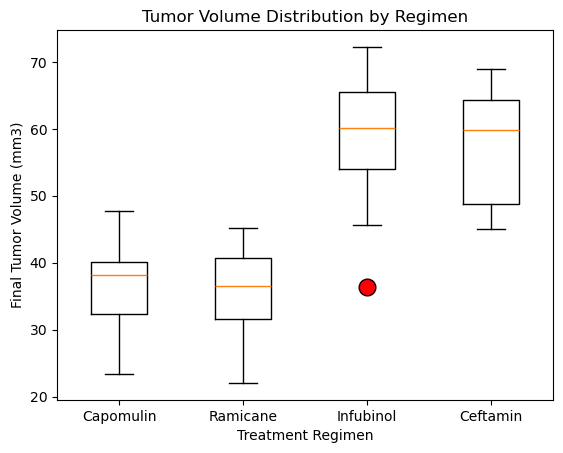

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment regimen


flierprops = dict(marker='o', markerfacecolor='r', markeredgecolor='black', markersize='12')

# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment Regimen")
plt.title("Tumor Volume Distribution by Regimen")
plt.show()

## Line and Scatter Plots

In [17]:
clean_data[(clean_data['Drug Regimen']=='Capomulin') & (clean_data['Mouse ID'].str.contains("509"))]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
231,l509,Capomulin,Male,17,21,0,45.000000,0
253,l509,Capomulin,Male,17,21,5,45.851193,0
539,l509,Capomulin,Male,17,21,10,46.759074,0
881,l509,Capomulin,Male,17,21,15,47.488599,1
982,l509,Capomulin,Male,17,21,20,48.070452,2
1146,l509,Capomulin,Male,17,21,25,44.006257,2
1414,l509,Capomulin,Male,17,21,30,44.708055,2
1499,l509,Capomulin,Male,17,21,35,40.207288,2
1723,l509,Capomulin,Male,17,21,40,40.770813,2
1771,l509,Capomulin,Male,17,21,45,41.483008,3


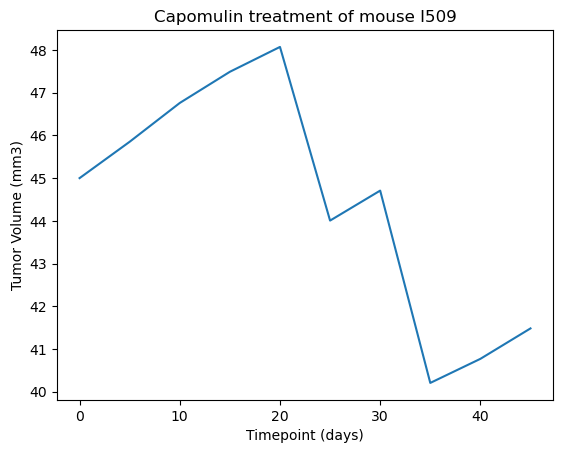

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

capomulin_treatment = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') &
                                (clean_data['Mouse ID'] == mouse_id)]

plt.plot(capomulin_treatment['Timepoint'], capomulin_treatment['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')

# Set x and y ticks
# plt.xticks(capomulin_treatment['Timepoint'])
# plt.yticks([40, 41, 42, 43, 44, 45, 46, 47, 48])

plt.show()

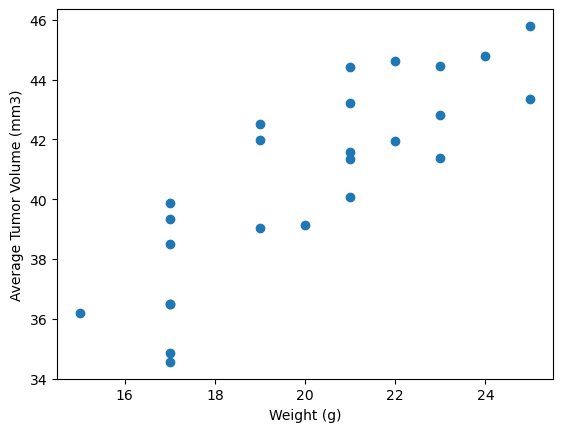

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data_results[mouse_data_results['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for mice treated with Capomulin
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get weight for each mouse treated with capomulin
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])

# Scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [20]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


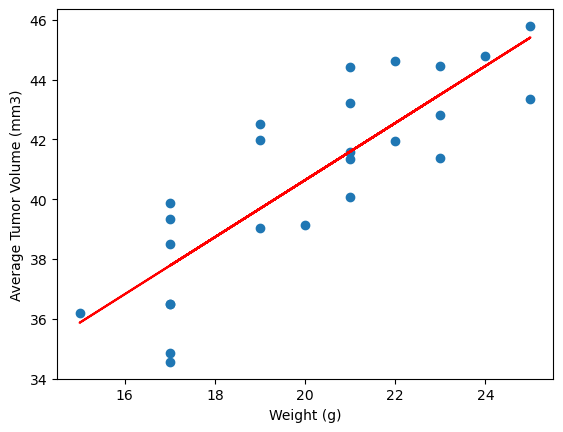

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = average_tumor_volume.corr(mouse_weight)

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color = 'red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

rounded_correlation = round(correlation_coefficient, 2)
print(f'The correlation between mouse weight and the average tumor volume is {rounded_correlation}')
plt.show()